# MODELO CLASIFICACION TREE 

Presentamos e Importamos todas las librerias que vamos a necesitar a lo largo del modelo.

In [1]:
import pandas as pd
import numpy as np

#Libreria Metricas
from sklearn.metrics import f1_score, recall_score, precision_score, accuracy_score
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import auc
from sklearn.model_selection import KFold
from sklearn.metrics import log_loss

#Librerias Visualizacion
import matplotlib.pyplot as plt
import pylab as pl
import seaborn as sns 
from pylab import rcParams 
from matplotlib import pyplot

#Librerias Modelos
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split 


Leemos y presentamos nuestra Base de Datos. Mostramos las 5 primeras filas, el tipo y el nombre de las Columnas / variables que la componen. Las variables que se refierne a unidades de negocio no las vamos a utilizar en el modelo por lo que las transformamos a Objeto para un mejor entendimiento y segmentacion de las propias variables. La variable edad tambien es transformada a Int(64)

In [2]:
df = pd.read_csv('/home/dsc/Master-Kschool/TFM/Financial-Product-Sales-Forecast-Model/0rigin_data/cleanned_data/df.tfm')

In [3]:
df.head(2)

,cliente,saldo_captacion,esta_carterizado,cliente_bbp,tipo_gestor,gestor,cartera_patron,codigo_cartera,digital_3_meses,camino_digital,...,edad,seg_valor,seg_recorrido,dz,oficina,lp_seg_vida,lp_seg_acc,lp_seg_salud,lp_seg_hogar,lp_seg_auto
0,1,1328106.49,SI,NO,ASESOR FINANCIERO,18287.0,ASESORAMIENTO FINANCIERO,14881.0,SI,COMPRADOR,...,69.0,ALTO,BAJO RECORRIDO,2,210,0,0,0,1,0
1,2,1142234.34,SI,NO,ASESOR FINANCIERO,18287.0,ASESORAMIENTO FINANCIERO,14881.0,SI,COMPRADOR,...,81.0,ALTO,ALTO RECORRIDO,2,210,0,0,0,0,0


In [4]:
df.columns

Index(['cliente', 'saldo_captacion', 'esta_carterizado', 'cliente_bbp',
       'tipo_gestor', 'gestor', 'cartera_patron', 'codigo_cartera',
       'digital_3_meses', 'camino_digital', 'saldo_financiacion', 'saldo_ffii',
       'saldo_plp', 'lp_dom_ingresos', 'lp_tjta_cto', 'lp_tjt_rev', 'lp_rbos',
       'lp_of_int', 'marca_bp', 'marca_ccte', 'edad', 'seg_valor',
       'seg_recorrido', 'dz', 'oficina', 'lp_seg_vida', 'lp_seg_acc',
       'lp_seg_salud', 'lp_seg_hogar', 'lp_seg_auto'],
      dtype='object')

## PRIMERA APROXIMACION AL MODELO

In [6]:
df = df.select_dtypes('number')

In [7]:
# Inputs y Target 
X = df.drop(['lp_seg_hogar'], axis = 1)
y= df['lp_seg_hogar']
print('Datos X =', X.size, X.shape)
print('Datos y =', y.size, y.shape)

Datos X = 8576106 (451374, 19)
Datos y = 451374 (451374,)


In [8]:
clftree = DecisionTreeClassifier()

In [9]:
clftree.fit(X,y)

DecisionTreeClassifier()

In [10]:
clftree.predict(X)

array([1, 0, 0, ..., 0, 0, 0])

In [11]:
test_size = 0.20
seed = 7
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = test_size, random_state = seed)

In [12]:
clftree.fit(X_train,y_train)

DecisionTreeClassifier()

In [13]:
clftree.predict(X_test)

array([0, 1, 0, ..., 0, 1, 0])

In [14]:
clftree.predict_proba(X_test)[:, 1]

array([0., 1., 0., ..., 0., 1., 0.])

In [15]:
print('== Primera Aproximacion TREE_model ==')
print ('accuracy_score =', accuracy_score(y_test,clftree.predict(X_test)))
print('====================================')
print('precision  =', precision_score(y_test,clftree.predict(X_test)))
print('====================================')
print('recall =', recall_score(y_test,clftree.predict(X_test)))
print('====================================')
print('f1_score =', f1_score(y_test,clftree.predict(X_test)))
print('====================================')
print('roc_auc_score =', roc_auc_score(y_test,clftree.predict_proba(X_test)[:, 1]))
print('====================================')
print('classification_report')
print(classification_report(y_test, clftree.predict(X_test)))

== Primera Aproximacion TREE_model ==
accuracy_score = 0.8132040985876489
precision  = 0.2981396088408332
recall = 0.3182011030971574
f1_score = 0.3078438615933998
roc_auc_score = 0.6028640883048534
classification_report
              precision    recall  f1-score   support

           0       0.90      0.89      0.89     78490
           1       0.30      0.32      0.31     11785

    accuracy                           0.81     90275
   macro avg       0.60      0.60      0.60     90275
weighted avg       0.82      0.81      0.82     90275



Sin entrenar: ROC AUC=0.500
Regresión Logística: ROC AUC=0.603


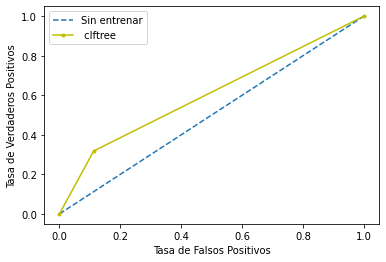

In [16]:
#Generamos un clasificador sin entrenar , que asignará 0 a todo
sin_entrenar = [0 for _ in range(len(X_test))]
# Calculamos el AUC
ns_auc = roc_auc_score(y_test, sin_entrenar)
lr_auc = roc_auc_score(y_test, clftree.predict_proba(X_test)[:, 1])
# Imprimimos en pantalla
print('Sin entrenar: ROC AUC=%.3f' % (ns_auc))
print('Regresión Logística: ROC AUC=%.3f' % (lr_auc))
# Calculamos las curvas ROC
ns_fpr, ns_tpr, _ = roc_curve(y_test, sin_entrenar)
lr_fpr, lr_tpr, _ = roc_curve(y_test, clftree.predict_proba(X_test)[:, 1])
# Pintamos las curvas ROC
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='Sin entrenar')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label=' clftree' , color = "y")
# Etiquetas de los ejes
pyplot.xlabel('Tasa de Falsos Positivos')
pyplot.ylabel('Tasa de Verdaderos Positivos')
pyplot.legend()
pyplot.show()

## MODELO

In [17]:
df_normalizado = pd.read_csv('/home/dsc/Master-Kschool/TFM/Financial-Product-Sales-Forecast-Model/Preprocessing/df_normalizado.csv')

In [18]:
# Liberias Precargadas al inicio del notebook
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

In [19]:
X = df_normalizado.drop(['lp_seg_hogar'], axis = 1)
y= df_normalizado['lp_seg_hogar']
print('Datos X =', X.size, X.shape)
print('Datos y =', y.size, y.shape)

Datos X = 8774052 (417812, 21)
Datos y = 417812 (417812,)


In [20]:
test_size = 0.2
seed = 7
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = test_size, random_state = seed)

In [21]:
clftree = DecisionTreeClassifier(class_weight ='balanced')

In [22]:
clftree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced')

In [23]:
clftree.predict(X_test)

array([1., 0., 0., ..., 0., 0., 0.])

In [24]:
clftree.predict_proba(X_test)[:, 1]

array([1., 0., 0., ..., 0., 0., 0.])

__Primeros resultados__. Los resultados obtenidos de train y test utilizando como medida la metrica recall informan que el modelo no esta generalizando bien. Existe un calara situacion de overfiting que debo solucionar. Lo confirmarmos mediante Cross Validation. Para buscar soluciones y como siguiente paso utilizaremos Grid Search para buscar los mejores parametros a utilizar con este modelo y poder obtener una metrica correcta.


In [25]:
print('===========RECALL TRAIN============')
print('recall =', recall_score(y_train,clftree.predict(X_train)))
print('===========RECALL TEST=============')
print('recall =', recall_score(y_test,clftree.predict(X_test)))

===========RECALL TRAIN============
recall = 1.0
===========RECALL TEST=============
recall = 0.4300017721070353


## Tecnicas Validacion Cruzada.  Metrics: Cross validation
Utilizamos Cross Validation para iterar con 'K_folds_veces' a lo largo del set de entrenamiento
- K_Fold utilizado 5 veces.

- Apartaremos 1/5 de muestras.
- Entrenamos al modelo con el restante 4/5 de muestras.
- Mediremos con distintas metricas el resultado obtenido sobre las muestras apartadas.
- Esto quiere decir que hacemos 5 entrenamientos independientes.
- Los resultados serán el promedio de las 5 accuracies anteriores.

In [26]:
from sklearn.model_selection import cross_val_score
cross_val_score_precision = cross_val_score(clftree,X,y,cv=5,scoring="precision").mean()
cross_val_score_recall = cross_val_score(clftree,X,y,cv=5,scoring="recall").mean()
cross_val_score_f1 = cross_val_score(clftree,X,y,cv=5,scoring="f1").mean() 
cross_val_score_precision , cross_val_score_recall, cross_val_score_f1

(0.4402302091117664, 0.4291943957968477, 0.4346404097251038)

[[65941  6336]
 [ 6433  4853]]


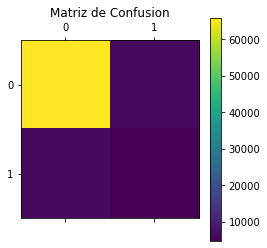

In [27]:
matriz_confusion_clftree = confusion_matrix(y_test,clftree.predict(X_test))
print(matriz_confusion_clftree)
pl.matshow(confusion_matrix(y_test,clftree.predict(X_test)))
pl.title('Matriz de Confusion')
pl.colorbar()
pl.show()

In [28]:
print('========= CLFTREE ==================')
print ('accuracy_score = ', accuracy_score(y_test,clftree.predict(X_test)))
print('====================================')
print('precision =', precision_score(y_test,clftree.predict(X_test)))
print('====================================')
print('recall =', recall_score(y_test,clftree.predict(X_test)))
print('====================================')
print('f1_score =', f1_score(y_test,clftree.predict(X_test)))
print('====================================')
print('roc_auc_score =', roc_auc_score(y_test,clftree.predict_proba(X_test)[:, 1]))
print('====================================')


========= CLFTREE ==================
accuracy_score =  0.8471931357179613
precision = 0.4337295558137456
recall = 0.4300017721070353
f1_score = 0.4318576195773081
roc_auc_score = 0.6711903378321246


## Pintamos Curva Roc

Sin entrenar: ROC AUC=0.500
Regresión Logística: ROC AUC=0.671


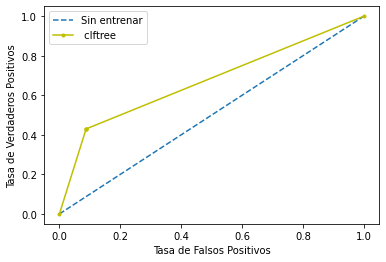

In [29]:
#Generamos un clasificador sin entrenar , que asignará 0 a todo
sin_entrenar = [0 for _ in range(len(X_test))]
# Calculamos el AUC
ns_auc = roc_auc_score(y_test, sin_entrenar)
lr_auc = roc_auc_score(y_test, clftree.predict_proba(X_test)[:, 1])
# Imprimimos en pantalla
print('Sin entrenar: ROC AUC=%.3f' % (ns_auc))
print('Regresión Logística: ROC AUC=%.3f' % (lr_auc))
# Calculamos las curvas ROC
ns_fpr, ns_tpr, _ = roc_curve(y_test, sin_entrenar)
lr_fpr, lr_tpr, _ = roc_curve(y_test, clftree.predict_proba(X_test)[:, 1])
# Pintamos las curvas ROC
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='Sin entrenar')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label=' clftree' , color = "y")
# Etiquetas de los ejes
pyplot.xlabel('Tasa de Falsos Positivos')
pyplot.ylabel('Tasa de Verdaderos Positivos')
pyplot.legend()
pyplot.show()

## GridSearchCV

In [30]:
from sklearn.model_selection import GridSearchCV

In [31]:
 DecisionTreeClassifier() solo para ver paramentros

In [32]:
# criterion = 'entropy', class_weight ='balanced',max_depth=6,min_samples_leaf=100,
tree_grid_params = {       
    'criterion' : ['gini', 'entropy'],
    'max_depth' : [2,4,6,8,10],
    'min_samples_split' : [2,4,6],
    'min_samples_leaf' : [100,115,130]
    }

treegs = GridSearchCV(
        clftree,
        tree_grid_params,
        verbose = 1,
        cv = 3,
        n_jobs = -1
        )

In [33]:
treegs.fit(X_train,y_train)

Fitting 3 folds for each of 90 candidates, totalling 270 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  38 tasks      | elapsed:    8.2s
[Parallel(n_jobs=-1)]: Done 188 tasks      | elapsed:   44.6s
[Parallel(n_jobs=-1)]: Done 270 out of 270 | elapsed:  1.3min finished


GridSearchCV(cv=3, estimator=DecisionTreeClassifier(class_weight='balanced'),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 4, 6, 8, 10],
                         'min_samples_leaf': [100, 115, 130],
                         'min_samples_split': [2, 4, 6]},
             verbose=1)

In [34]:
treegs.best_score_

0.7530972769948105

In [35]:
treegs.best_estimator_

DecisionTreeClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=10, min_samples_leaf=100)

In [36]:
treegs.best_params_

{'criterion': 'entropy',
 'max_depth': 10,
 'min_samples_leaf': 100,
 'min_samples_split': 2}

## Hacemos el modelo con los mejores parametros

In [37]:
clftree = DecisionTreeClassifier(criterion = 'gini', class_weight ='balanced',
                                 max_depth=10,min_samples_leaf=10,
                                 min_samples_split = 4)

In [38]:
clftree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=10,
                       min_samples_leaf=10, min_samples_split=4)

In [39]:
predictionstree = clftree.predict(X_test)

In [40]:
probabilitiestree = clftree.predict_proba(X_test)

In [41]:
clftree.predict(X_test)

array([1., 0., 0., ..., 0., 1., 0.])

In [42]:
clftree.predict_proba(X_test)[:, 1]

array([0.53834174, 0.09911808, 0.02153908, ..., 0.37516217, 0.78537465,
       0.00141513])

__Evaluacion de overfiting.__ Los resultados obtenidos de train y test utilizando como medida la metrica recall informan que se ha conseguido mediante utilizacion de mejores parametros resolver el overfiting.Lo confirmarmos mediante Cross Validation y distintas medias de metricas. 


In [43]:
print('===========RECALL TRAIN============')
print('recall =', recall_score(y_train,clftree.predict(X_train)))
print('===========RECALL TEST=============')
print('recall =', recall_score(y_test,clftree.predict(X_test)))

===========RECALL TRAIN============
recall = 0.8739904832583927
===========RECALL TEST=============
recall = 0.8665603402445508


## Metrics: Cross validation

In [44]:
from sklearn.model_selection import cross_val_score
cross_val_score_precision = cross_val_score(clftree,X,y,cv=5,scoring="precision").mean()
cross_val_score_recall = cross_val_score(clftree,X,y,cv=5,scoring="recall").mean()
cross_val_score_f1 = cross_val_score(clftree,X,y,cv=5,scoring="f1").mean() 
cross_val_score_precision , cross_val_score_recall, cross_val_score_f1

(0.33048542215717547, 0.8675656742556918, 0.47855709216779385)

### Confussion Matrix

[[52336 19941]
 [ 1506  9780]]


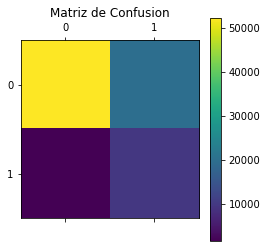

In [45]:
matriz_confusion_clftree = confusion_matrix(y_test,clftree.predict(X_test))
print(matriz_confusion_clftree)
pl.matshow(confusion_matrix(y_test,clftree.predict(X_test)))
pl.title('Matriz de Confusion')
pl.colorbar()
pl.show()

In [46]:
print('========= CLFTREE ===================')
print ('accuracy_score = ', accuracy_score(y_test,clftree.predict(X_test)))
print('====================================')
print('precision =', precision_score(y_test,clftree.predict(X_test)))
print('====================================')
print('recall =', recall_score(y_test,clftree.predict(X_test)))
print('====================================')
print('f1_score =', f1_score(y_test,clftree.predict(X_test)))
print('====================================')
print('roc_auc_score =', roc_auc_score(y_test,clftree.predict_proba(X_test)[:, 1]))
print('====================================')


========= CLFTREE ===================
accuracy_score =  0.743343345739143
precision = 0.3290602604219239
recall = 0.8665603402445508
f1_score = 0.47699173311873583
roc_auc_score = 0.8767920958617497


Sin entrenar: ROC AUC=0.500
Regresión Logística: ROC AUC=0.877


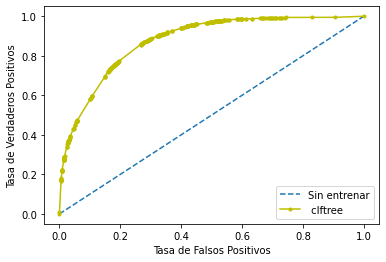

In [47]:
#Generamos un clasificador sin entrenar , que asignará 0 a todo
sin_entrenar = [0 for _ in range(len(X_test))]
# Calculamos el AUC
ns_auc = roc_auc_score(y_test, sin_entrenar)
lr_auc = roc_auc_score(y_test, clftree.predict_proba(X_test)[:, 1])
# Imprimimos en pantalla
print('Sin entrenar: ROC AUC=%.3f' % (ns_auc))
print('Regresión Logística: ROC AUC=%.3f' % (lr_auc))
# Calculamos las curvas ROC
ns_fpr, ns_tpr, _ = roc_curve(y_test, sin_entrenar)
lr_fpr, lr_tpr, _ = roc_curve(y_test, clftree.predict_proba(X_test)[:, 1])
# Pintamos las curvas ROC
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='Sin entrenar')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label=' clftree' , color = "y")
# Etiquetas de los ejes
pyplot.xlabel('Tasa de Falsos Positivos')
pyplot.ylabel('Tasa de Verdaderos Positivos')
pyplot.legend()
pyplot.show()

## *** Conclusiones Modelo ***

- __La metrica elegida__ para evaluar nuestro  Modelo de clasificacion Decision Tree es __Recall y AUC - Curva Roc.__ 
- Iniciamos nuestro modelo con una __primera aproximacion__ obteniendo unos resultados __muy mejorables. Recall 0.31__ La base de datos utilizada es la original sin haber realizado ningun preprocesado. 
- Evolucionamos nuestro modelo. Utilizamos como base de datos df_normalizado ya preprocesada en nuestro bloque de preprocessing. (Adaptado, aplicado Label Encoder, Standar Scaler y  Normalizado variables.)  
- Dado que nuestro __Target esta muy desbalanceado__ a razon de 87% No y 13% Si, en el entremaniemto del modelo se ha utilizado de inicio el parametro de 'class_weight = 'balanced'
- __Vemos de inicio como nuestro set de entramiento no ha generalizado bien. Existe una gran diferencia entre los resultados obtenidos de Test y Train. 1 Train - 0.43 Test. Podemos en este caso confirmar la existencia de overfiting__ Comprobamos mediante Cross Validation obteniendo medias de distintas metricas.

- Necesitamos mejorar el modelo y para ello utilizamos GridSearch para buscar soluciones y mejores parametros. Una vez obtenidos, entrenamos de nuevo y sacamos nuevamente metricas Recall 0.87 Train - 0.86 Test para confirmar entre otras cosas que hemos conseguido solucionar el overfiting y que nuestro modelo ha conseguido generalizar bien. Confirmamos con Cross Validation obteniendo las medias de distintas metricas con 5 validaciones.
- _Nuestras metricas elegidas finalmente son Reccal 0.86 y AUC 0,87 que consideramos apropiadas para la explicacion de nuestro modelo. 
- Por ultimo confirmar todo lo anteriormente expuesto con el estudio de la matriz de confusion. Obtenemos unos resultados de Falsos negativos 1506  y verdaderos negativos 9780.  En nuestro modelo prima la deteccion de clientes que no van a contratar el seguro. Detectando aquellos clientes que no son susceptibles de tener el seguro de hogar podemos trabajar con aquellos que si pueden tenerlo. Todo ello con un objetivo de optimizacion del tiempo y eficiencia comercial.
- Se echan en falta, entre otras muchas, variables y datos como la renta de los clientes,  tipo de trabajo,  o nomina real en euros obtenida. 

### Visualizacion Arbol 

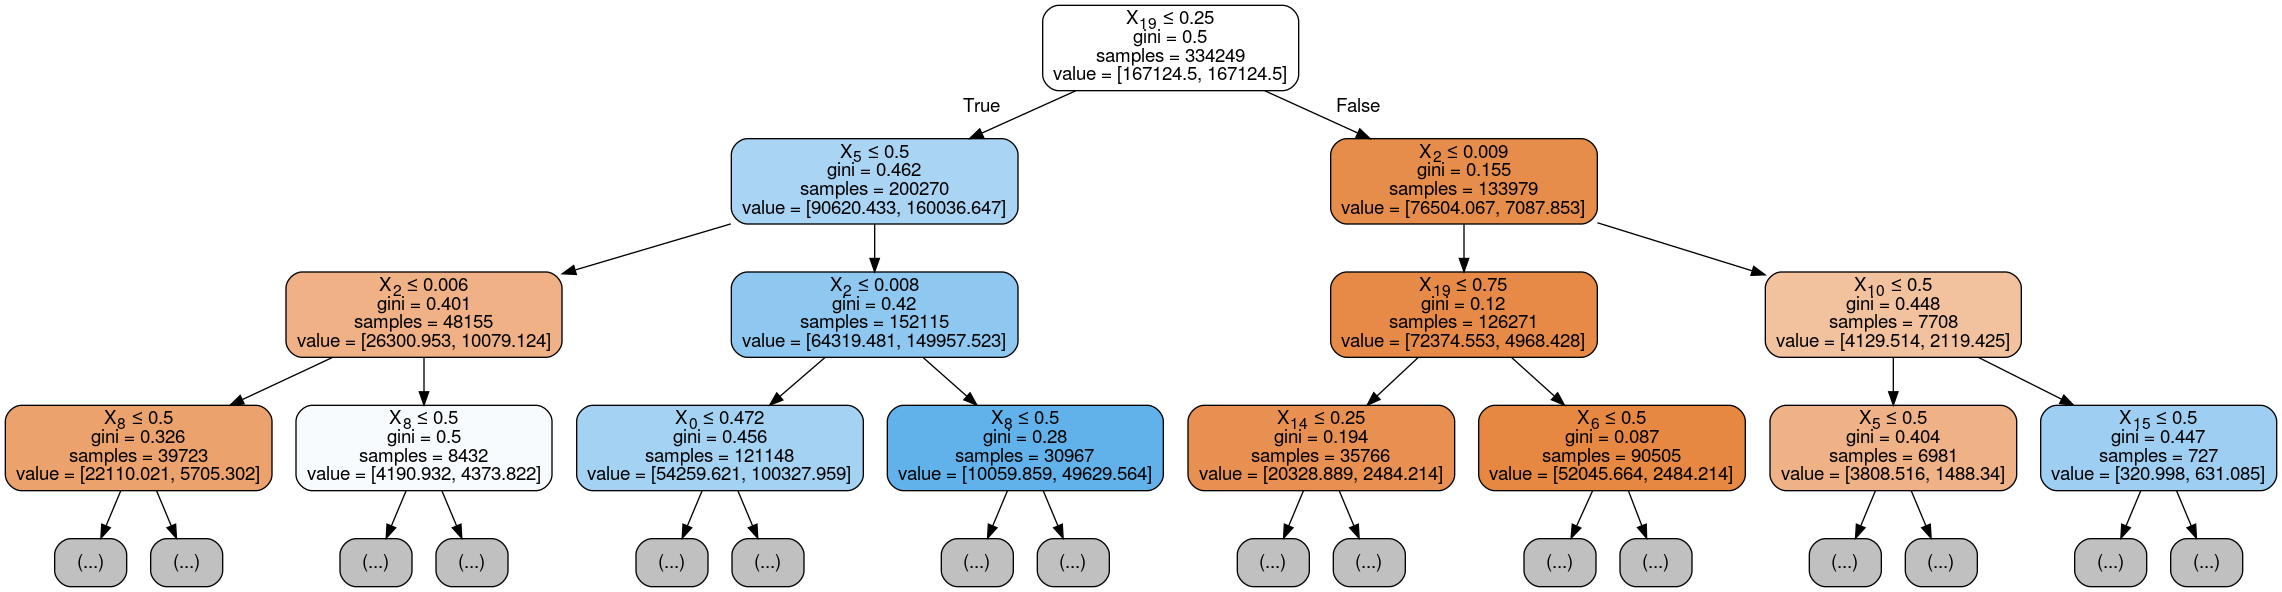

In [66]:
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus
from io import StringIO  
dot_data = StringIO()
export_graphviz(clftree, max_depth = 3,out_file=dot_data,filled=True, rounded=True,
special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png(),height = 120,width = 10000)